In [124]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import pickle

In [106]:
# Reading prepared data into a dataframe
df = pd.read_csv("dataset.csv").set_index("DATE")
temp_cols = df.columns.tolist()
new_cols = temp_cols[1:] + temp_cols[0:1]
df = df[new_cols]
df.head()

,Year,Month,GDP/capita,CPI,ROI,MAT_cost,New_house_supply,new_prop,Personal Income,Umemp Rate,Working_Population,Old_percent,Median_inc,Subsidies,No. of Households,Urban Population%,CSUSHPISA
DATE,,,,,,,,,,,,,,,,,
2002-01-01,2002,1,50091.00,142.00,1.73,142.00,4.20,1632.00,10514.70,5.70,182566431.89,12.29,65820,24.18,109297.00,79.41,117.14
2002-02-01,2002,2,50156.00,142.20,1.74,142.20,4.00,1671.00,10531.60,5.70,182798390.11,12.29,65820,24.18,109297.00,79.41,117.84
2002-03-01,2002,3,50221.00,143.20,1.73,143.20,4.10,1559.00,10539.00,5.70,183078312.43,12.29,65820,24.18,109297.00,79.41,118.69
2002-04-01,2002,4,50286.00,143.50,1.75,143.50,4.30,1625.00,10574.20,5.90,183260453.02,12.29,65820,24.18,109297.00,79.41,119.61
2002-05-01,2002,5,50311.33,143.80,1.75,143.80,4.00,1705.00,10616.50,5.80,183508212.50,12.29,65820,24.18,109297.00,79.41,120.72


In [107]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)
df.head()

,GDP/capita,CPI,ROI,MAT_cost,New_house_supply,new_prop,Personal Income,Umemp Rate,Working_Population,Old_percent,Median_inc,Subsidies,No. of Households,Urban Population%,CSUSHPISA
DATE,,,,,,,,,,,,,,,
2002-01-01,50091.00,142.00,1.73,142.00,4.20,1632.00,10514.70,5.70,182566431.89,12.29,65820,24.18,109297.00,79.41,117.14
2002-02-01,50156.00,142.20,1.74,142.20,4.00,1671.00,10531.60,5.70,182798390.11,12.29,65820,24.18,109297.00,79.41,117.84
2002-03-01,50221.00,143.20,1.73,143.20,4.10,1559.00,10539.00,5.70,183078312.43,12.29,65820,24.18,109297.00,79.41,118.69
2002-04-01,50286.00,143.50,1.75,143.50,4.30,1625.00,10574.20,5.90,183260453.02,12.29,65820,24.18,109297.00,79.41,119.61
2002-05-01,50311.33,143.80,1.75,143.80,4.00,1705.00,10616.50,5.80,183508212.50,12.29,65820,24.18,109297.00,79.41,120.72


In [108]:
# Plotting correlation between all variables (Dependent and Independent)
df.corr()

,GDP/capita,CPI,ROI,MAT_cost,New_house_supply,new_prop,Personal Income,Umemp Rate,Working_Population,Old_percent,Median_inc,Subsidies,No. of Households,Urban Population%,CSUSHPISA
GDP/capita,1.00,0.92,-0.16,0.92,-0.06,-0.17,0.94,-0.36,0.85,0.94,0.84,0.91,0.93,0.94,0.90
CPI,0.92,1.00,-0.34,1.00,0.06,-0.34,0.90,-0.12,0.84,0.90,0.68,0.93,0.90,0.92,0.84
ROI,-0.16,-0.34,1.00,-0.34,0.19,0.69,-0.34,-0.52,-0.40,-0.38,0.07,-0.40,-0.40,-0.40,0.09
MAT_cost,0.92,1.00,-0.34,1.00,0.06,-0.34,0.90,-0.12,0.84,0.90,0.68,0.93,0.90,0.92,0.84
New_house_supply,-0.06,0.06,0.19,0.06,1.00,-0.30,-0.07,0.15,0.11,-0.17,-0.12,-0.01,-0.04,-0.05,-0.00
new_prop,-0.17,-0.34,0.69,-0.34,-0.30,1.00,-0.28,-0.55,-0.59,-0.27,0.20,-0.38,-0.45,-0.41,0.16
Personal Income,0.94,0.90,-0.34,0.90,-0.07,-0.28,1.00,-0.10,0.86,0.97,0.81,0.97,0.94,0.97,0.82
Umemp Rate,-0.36,-0.12,-0.52,-0.12,0.15,-0.55,-0.10,1.00,-0.02,-0.18,-0.45,-0.02,-0.13,-0.12,-0.42
Working_Population,0.85,0.84,-0.40,0.84,0.11,-0.59,0.86,-0.02,1.00,0.85,0.55,0.89,0.96,0.94,0.62
Old_percent,0.94,0.90,-0.38,0.90,-0.17,-0.27,0.97,-0.18,0.85,1.00,0.83,0.96,0.95,0.98,0.81


Text(0.5, 1.0, 'Correlation Heatmap')

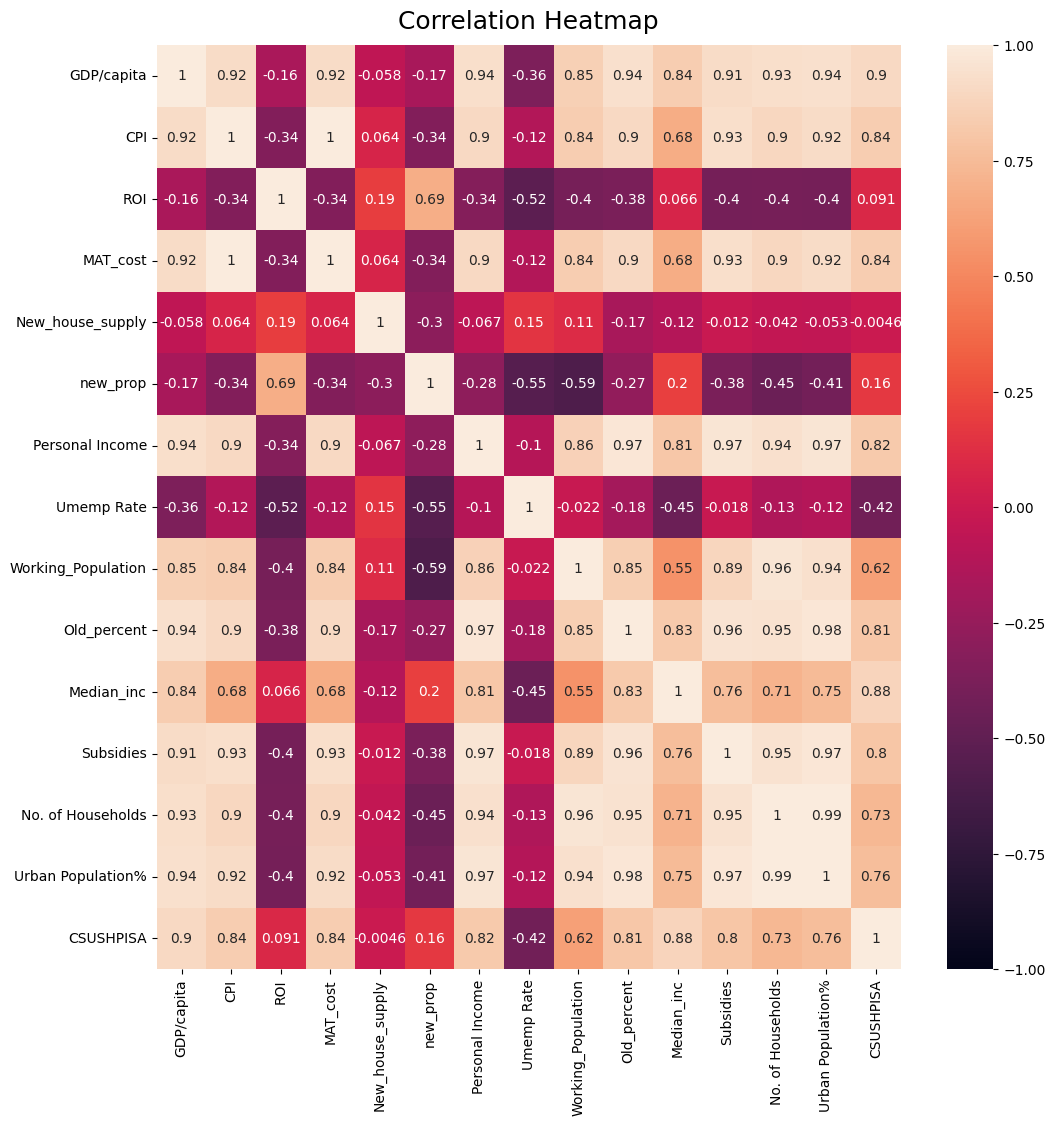

In [109]:
### Plotting the correlation between all features and the label
plt.figure(figsize = (12, 12))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

In [110]:
# Function for Variance Inflation Factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [111]:
# Calculating the VIF for features to find Multicollinearity
X = df.iloc[:,:-1]
calc_vif(X)

/home/sid/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,GDP/capita,19698.84
1,CPI,inf
2,ROI,8.79
3,MAT_cost,inf
4,New_house_supply,48.67
5,new_prop,97.86
6,Personal Income,2160.78
7,Umemp Rate,99.43
8,Working_Population,112894.08
9,Old_percent,15839.15


In [112]:
# Dropping multicollinearity columns
mult_cols = ["CPI", "MAT_cost", "Personal Income", "Working_Population", 
             "Old_percent", "Median_inc", "Subsidies", "No. of Households", "Urban Population%"]
df.drop(columns = mult_cols, inplace = True)

In [113]:
df.head()

,GDP/capita,ROI,New_house_supply,new_prop,Umemp Rate,CSUSHPISA
DATE,,,,,,
2002-01-01,50091.00,1.73,4.20,1632.00,5.70,117.14
2002-02-01,50156.00,1.74,4.00,1671.00,5.70,117.84
2002-03-01,50221.00,1.73,4.10,1559.00,5.70,118.69
2002-04-01,50286.00,1.75,4.30,1625.00,5.90,119.61
2002-05-01,50311.33,1.75,4.00,1705.00,5.80,120.72


In [114]:
# Calculating multicollinearity after dropping columns
X = df.iloc[:,:]
calc_vif(X)

,variables,VIF
0,GDP/capita,145.87
1,ROI,5.35
2,New_house_supply,16.86
3,new_prop,21.33
4,Umemp Rate,17.06
5,CSUSHPISA,75.57


In [115]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

In [116]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [117]:
# Scaling the train data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


Implementing GridSearchCV to test various models with different hyperparameters


In [119]:

random_state = 42
# Create the pipeline with a dictionary for each model's hyperparameters
pipeline = Pipeline([
    ('Regressor', LinearRegression())  # Default regressor, will be changed during grid search
])

# Define the hyperparameter grid for each algorithm
params = [
    {
        'Regressor' : [RandomForestRegressor(random_state=random_state)],
        'Regressor__criterion': ['friedman_mse'],
        'Regressor__n_estimators': [50, 100, 500],
    },
    {
        'Regressor' : [DecisionTreeRegressor(random_state=random_state)],
        'Regressor__criterion' : ['friedman_mse'],
        'Regressor__max_depth' : [None, 1, 5, 10, 15],
    },
    {
        'Regressor' : [XGBRegressor(random_state=random_state)],
        'Regressor__learning_rate' : [0.01, 0.1, 0.2, 0.5],
    },
    {
        'Regressor' : [LinearRegression()],
    },
    {
        'Regressor' : [svm.SVR()],
        'Regressor__kernel' :['linear', 'poly', 'rbf']
    }
]

In [120]:
# Running GridSearchCV on the pipeline and extracting the best model with best hyperparameters with the best score
grid_search = GridSearchCV(pipeline, params, cv = 5, scoring = ['r2', 'neg_root_mean_squared_error'], refit='r2', verbose = 2)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END Regressor=RandomForestRegressor(random_state=42), Regressor__criterion=friedman_mse, Regressor__n_estimators=50; total time=   0.1s
[CV] END Regressor=RandomForestRegressor(random_state=42), Regressor__criterion=friedman_mse, Regressor__n_estimators=50; total time=   0.1s
[CV] END Regressor=RandomForestRegressor(random_state=42), Regressor__criterion=friedman_mse, Regressor__n_estimators=50; total time=   0.1s
[CV] END Regressor=RandomForestRegressor(random_state=42), Regressor__criterion=friedman_mse, Regressor__n_estimators=50; total time=   0.1s
[CV] END Regressor=RandomForestRegressor(random_state=42), Regressor__criterion=friedman_mse, Regressor__n_estimators=50; total time=   0.1s
[CV] END Regressor=RandomForestRegressor(random_state=42), Regressor__criterion=friedman_mse, Regressor__n_estimators=100; total time=   0.1s
[CV] END Regressor=RandomForestRegressor(random_state=42), Regressor__criterion=friedman_mse

In [121]:
print(best_score)
print(best_model)
print(best_params)

0.9685526166988241
Pipeline(steps=[('Regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estima

Our model has a R2 score of 96 and Mean Square Error of 69.82.

In [122]:
# Selecting XGBoostRegressor as our model as per GridSearchCV and setting best hyperparameters, and calculating the MSE
model = best_model
model.set_params(**best_params)
model.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
y_pred = model.predict(X_test)
test_mae_dtr = mean_absolute_error(predict, y_test)
print('MAE scores', test_mae_dtr)

MAE scores 69.82869514060506


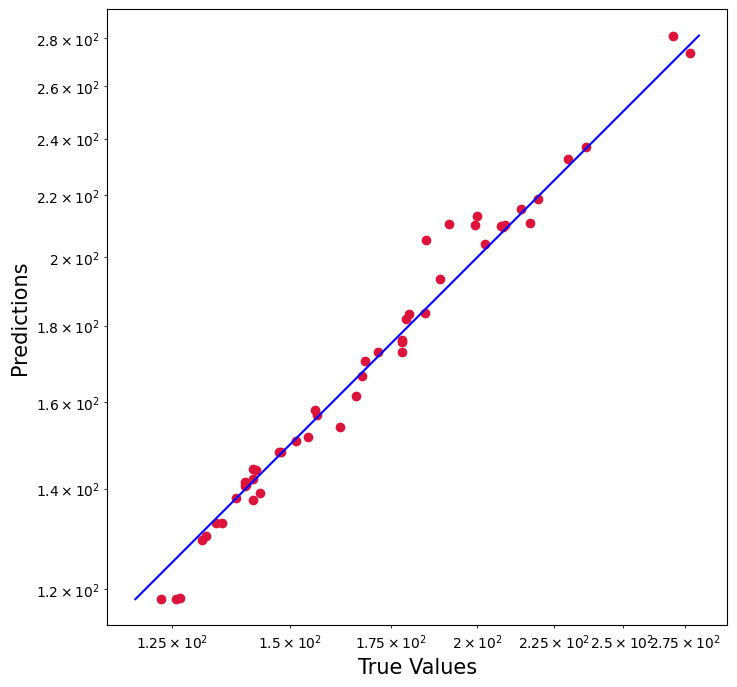

In [123]:
# Plotting predicted values on the test dataset vs. the actual values present in the test labels
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [125]:
# Saving the best model
pickle.dump(model, open('model.pkl', 'wb'))